In [1]:
import nannyml as nml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
ref_df, ana_df, targets = nml.load_synthetic_car_loan_dataset()
ana_df.head()

,car_value,salary_range,debt_to_income_ratio,loan_length,repaid_loan_on_prev_car,size_of_downpayment,driver_tenure,timestamp,y_pred_proba,y_pred
0,12638.0,0 - 20K €,0.487926,21.0,False,10%,4.224628,2018-10-30 18:00:00.000,0.99,1
1,52425.0,20K - 20K €,0.672183,20.0,False,40%,4.963103,2018-10-30 18:08:43.152,0.98,1
2,20369.0,40K - 60K €,0.703090,19.0,True,40%,4.588951,2018-10-30 18:17:26.304,0.98,1
3,10592.0,20K - 20K €,0.653258,21.0,False,10%,4.711015,2018-10-30 18:26:09.456,0.97,1
4,33933.0,0 - 20K €,0.722263,18.0,False,0%,0.906738,2018-10-30 18:34:52.608,0.92,1


In [3]:
targets.head()

,repaid
0,1
1,1
2,1
3,1
4,1


In [4]:
# merge targets with ana_df on the index
full_ana_df = ana_df.merge(targets, left_index=True, right_index=True)



In [5]:
estimator = nml.CBPE(
    y_pred_proba='y_pred_proba',
    y_pred='y_pred',
    y_true='repaid',
    timestamp_column_name='timestamp',
    metrics=['business_value'],
    chunk_size=5000,
    problem_type='classification_binary',
    business_value_matrix=[[0, -5], [-10, 10]],
    normalize_business_value='per_prediction',
)

In [6]:
estimator.fit(ref_df)

In [7]:
results = estimator.estimate(full_ana_df)

In [8]:
display(results.to_df())

chunk                                                        \
              key chunk_index start_index end_index          start_date   
0        [0:4999]           0           0      4999 2018-01-01 00:00:00   
1     [5000:9999]           1        5000      9999 2018-01-31 06:36:00   
2   [10000:14999]           2       10000     14999 2018-03-02 13:12:00   
3   [15000:19999]           3       15000     19999 2018-04-01 19:48:00   
4   [20000:24999]           4       20000     24999 2018-05-02 02:24:00   
5   [25000:29999]           5       25000     29999 2018-06-01 09:00:00   
6   [30000:34999]           6       30000     34999 2018-07-01 15:36:00   
7   [35000:39999]           7       35000     39999 2018-07-31 22:12:00   
8   [40000:44999]           8       40000     44999 2018-08-31 04:48:00   
9   [45000:49999]           9       45000     49999 2018-09-30 11:24:00   
10       [0:4999]           0           0      4999 2018-10-30 18:00:00   
11    [5000:9999]           1        5000      9999 2018-11-30 00:36:00   
12  [10000:14999]           2       10000     14999 2018-12-30 07:12:00   
13  [15000:19999]           3       15000     19999 2019-01-29 13:48:00   
14  [20000:24999]           4       20000     24999 2019-02-28 20:24:00   
15  [25000:29999]           5       25000     29999 2019-03-31 03:00:00   
16  [30000:34999]           6       30000     34999 2019-04-30 09:36:00   
17  [35000:39999]           7       35000     39999 2019-05-30 16:12:00   
18  [40000:44999]           8       40000     44999 2019-06-29 22:48:00   
19  [45000:49999]           9       45000     49999 2019-07-30 05:24:00   

                                      business_value                          \
                  end_date     period          value sampling_error realized   
0  2018-01-31 06:27:16.848  reference       4.129603       0.081226    4.153   
1  2018-03-02 13:03:16.848  reference       4.097599       0.081226    4.057   
2  2018-04-01 19:39:16.848  reference       4.237903       0.081226    4.271   
3  2018-05-02 02:15:16.848  reference       4.166446       0.081226    4.174   
4  2018-06-01 08:51:16.848  reference       4.224742       0.081226    4.166   
5  2018-07-01 15:27:16.848  reference       4.142789       0.081226    4.135   
6  2018-07-31 22:03:16.848  reference       4.168361       0.081226    4.201   
7  2018-08-31 04:39:16.848  reference       4.249929       0.081226    4.248   
8  2018-09-30 11:15:16.848  reference       4.213318       0.081226    4.223   
9  2018-10-30 17:51:16.848  reference       4.225528       0.081226    4.196   
10 2018-11-30 00:27:16.848   analysis       4.341751       0.081226    4.343   
11 2018-12-30 07:03:16.848   analysis       4.079441       0.081226    4.066   
12 2019-01-29 13:39:16.848   analysis       4.111695       0.081226    4.159   
13 2019-02-28 20:15:16.848   analysis       4.129300       0.081226    4.124   
14 2019-03-31 02:51:16.848   analysis       4.232310       0.081226    4.185   
15 2019-04-30 09:27:16.848   analysis       3.863370       0.081226    3.856   
16 2019-05-30 16:03:16.848   analysis       3.843827       0.081226    3.863   
17 2019-06-29 22:39:16.848   analysis       3.842156       0.081226    3.840   
18 2019-07-30 05:15:16.848   analysis       3.815700       0.081226    3.877   
19 2019-08-29 11:51:16.848   analysis       4.001204       0.081226    3.956   

                                                                        \
   upper_confidence_boundary lower_confidence_boundary upper_threshold   
0                   4.373282                  3.885924        4.356059   
1                   4.341278                  3.853920        4.356059   
2                   4.481582                  3.994224        4.356059   
3                   4.410125                  3.922768        4.356059   
4                   4.468421                  3.981064        4.356059   
5                   4.386467                  3.899110        4.356059   
6       

In [9]:
metric_fig = results.plot()
metric_fig.show()

In [10]:
estimated = results.to_df()['business_value']['value'].values
realized = results.to_df()['business_value']['realized'].values

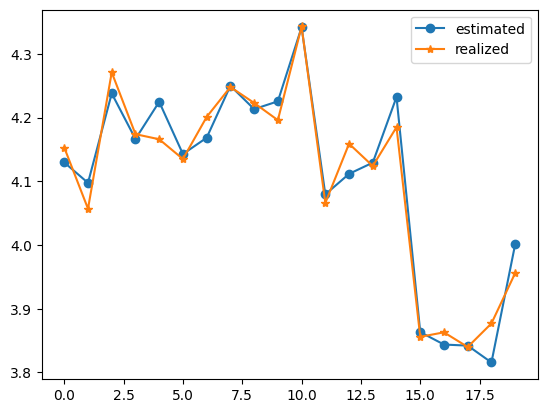

In [11]:
# plot estimated and realized
fig, ax = plt.subplots()
ax.plot(estimated, label='estimated', marker = 'o')
ax.plot(realized, label='realized', marker = '*')
ax.legend()

